In [1]:
import os
import numpy as np
import random
import logging
from itertools import combinations
from typing import Dict, Tuple, List

# Import custom functions from Metabackbone_functions and ER_functions modules
from Metabackbone_functions import (
    load_dna_structure_files, find_longest_strand, find_cross_over_in_longest_strand,
    calculate_left_right_pos, find_valid_point, find_bases_around_point,
    calculate_center_of_mass, calculate_bend_angle, find_bend_angle,
    find_bases_in_sphere, remove_three_strands_in_sphere, export_dna_structures,
    run_all_simulations, stored_removed_strands, remove_one_strand_in_sphere
)

from ipy_oxdna.dna_structure import DNAStructure, DNAStructureStrand, load_dna_structure, DNABase, strand_from_info
from ipy_oxdna.oxdna_simulation import Simulation, SimulationManager

from Evolutionary_algorithm_functions import (
    run_simulations_for_structure, load_simulated_structure, evaluate_fitness, check_dna_structure,
    create_index_position_map, get_indexes_from_positions, update_right_left_indexes,find_strands_in_sphere,plot_histogram,plot_angle_evolution, plot_best_vs_desired_angle
)

In [2]:
left_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3296,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332,3333,3334,3335,3336,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,4066,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176,4177,4178,4179,4180,4181,4182,4183,4184,4185,4186,4187,4188,4189,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4202,4203,4204,4205,4469,4470,4471,4472,4473,4474,4475,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523,4524,4525,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562,4563,4564,4565,4566,4567,4568,4569,4570,4571,4572,4573,4574,4575,4576,4577,4578,4579,4580,4581]
right_indices = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2527,2528,2529,2530,2531,2532,2533,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,3714,3715,3750,4206,4207,4208,4209,4210,4211,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224,4225,4226,4227,4228,4229,4230,4231,4232,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247]
sphere_radius = 3.0
eq_steps = 1e3
prod_steps = 1e3
rel_steps = 1e2
min_distance_threshold = 2.5
min_distance = 7.0
max_distance = 20.0
num_best_structures = 1
num_iterations = 6
sphere_radius = 3.0
desired_angle = 150.0
tolerance = 5.0

input_path = "/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/unmodified/1512_bp"
base_path = "/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/modified/1512_bp"
sim_base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/Notebook/Simulations_results/simulated_structures/1512_bp'

eq_parameters = {'dt':f'0.003','steps':f'{eq_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                 'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}

prod_parameters = {'dt':f'0.003','steps':f'{prod_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                   'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}
rel_parameters = {'steps': f'{rel_steps}', 'max_backbone_force': '200', 'max_backbone_force_far': '200'}

In [3]:
# logging.basicConfig(level=logging.INFO, filename='app.log', filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
colors = {'blue': '34', 'green': '32', 'yellow': '33', 'cyan': '36', 'red': '31', 'magenta': '35'}

def print_colored(message, color_code):
    print(f"\033[{color_code}m{message}\033[0m")


In [5]:
def load_dna_structure_files(input_path):
    dat_path = os.path.join(input_path, '1512_bp.dat')
    top_path = os.path.join(input_path, '1512_bp.top')
    dna = load_dna_structure(top_path, dat_path)
    return dna

In [6]:
def evolutionary_algorithm(initial_dna_structure, left_indices, right_indices, num_iterations, num_best_structures, desired_angle, tolerance, base_path, sim_base_path, sphere_radius):
    current_structures = [initial_dna_structure]
    current_left_indices = [left_indices]
    current_right_indices = [right_indices]
    removed_staples_dict = {}  # Dictionary to store removed staples info
    
    # Initialize lists to store the results
    left_indices_list = []
    right_indices_list = []
    
    fitness_history = []
    angle_history = []
    removed_staples_info_all_iterations = []

    for iteration in range(num_iterations):
        print_colored(f"\nStep 1: Iteration {iteration + 1}\n", colors['red'])
        
        new_structures = []
        new_left_indices = []
        new_right_indices = []
        removed_strands_info_all = []
        structure_origin = []  # To keep track of which structure each mutant came from
        
        for i, dna in enumerate(current_structures):
            print_colored(f"Step 2: Processing structure {i} in iteration {iteration + 1}\n", colors['yellow'])

            # Step 2: Find the longest strand in the DNA structure
            longest_strand, longest_strand_index = find_longest_strand(dna)
            print_colored(f'Step 3: Longest strand: {longest_strand}', colors['cyan'])
            print_colored(f'Longest strand index: {longest_strand_index}\n', colors['cyan'])

            # Step 3: Find a valid point on the structure
            point_pos = find_valid_point(dna, current_left_indices[i], current_right_indices[i], longest_strand)
            print_colored(f'Step 4: Found a valid point in the DNA structure: {point_pos}\n', colors['blue'])

            # Step 4: Define a sphere centered at the valid point
            # The sphere is conceptually defined here as the area around `point_pos` within `sphere_radius`
            print_colored(f'Step 5: Defined a sphere around the valid point with radius {sphere_radius}\n', colors['magenta'])
        
            # Step 5: Find the strands within that sphere, excluding the longest strand
            strands_in_sphere = find_strands_in_sphere(dna, point_pos, sphere_radius, exclude_strand = longest_strand_index)
            print_colored(f'Step 6: Number of strands found in the sphere: {len(strands_in_sphere)}\n', colors['green'])
        
            # Step 6: Remove one random staple from the staples within the sphere
            mutants, removed_strands = remove_one_strand_in_sphere(dna, point_pos, sphere_radius)
            removed_strands_info_all.extend(removed_strands)  # Log the strands removed within the sphere
            print_colored(f'Step 7: Removed strands within the sphere. Number of mutants generated: {len(mutants)}\n', colors['red'])

            # Step 7: Generate mutant structures
            new_structures.extend(mutants)
            structure_origin.extend([i] * len(mutants))  # Keep track of the origin
            print_colored(f"Step 8: By modifying structure {i}, {len(mutants)} mutant structures were produced.\n", colors['magenta'])

            # Step 8: Update the left and right indices for each mutant structure
            print_colored("Step 9: Updating left and right indices for each mutant...", colors['green'])
            updated_left_indices, updated_right_indices, removed_staples_info = update_right_left_indexes(mutants, removed_strands_info_all, current_left_indices[i], current_right_indices[i])

            # Store the updated indices
            new_left_indices.extend(updated_left_indices)
            new_right_indices.extend(updated_right_indices)
            print_colored(f'Step 10: Updated left indices: {updated_left_indices}', colors['cyan'])
            print_colored(f'Updated right indices: {updated_right_indices}\n', colors['cyan'])

        # Step 9: Export new DNA structures
        print_colored(f"Step 11: Exporting DNA structures...", colors['yellow'])
        export_paths = export_dna_structures(new_structures, base_path)
        print_colored(f"Exported DNA structures: {export_paths}\n", colors['yellow'])
    
        # Step 10: Simulate each modified structure
        for export_path in export_paths:
            structure_id = export_path['structure_id']
            print_colored(f"Step 12: Starting simulations for structure {structure_id}...", colors['red'])
            run_simulations_for_structure(structure_id, base_path, sim_base_path, rel_parameters, eq_parameters, prod_parameters)
            print_colored(f"Simulation completed for structure {structure_id}\n", colors['red'])
            
        # Step 11: Measure the angle at the joint for each mutant after simulation
        angles = []
        for export_path in export_paths:
            structure_id = export_path['structure_id']
            simulated_dna = load_simulated_structure(structure_id, sim_base_path)
            bend_angle = find_bend_angle(simulated_dna, left_indices, right_indices, longest_strand, point_pos)
            angles.append((structure_id, bend_angle))
            print_colored(f'Step 13: Structure {structure_id} - Bend Angle: {bend_angle}\n', colors['blue'])
        
        # Step 12: Evaluate fitness
        print_colored(f"Step 14: Evaluating fitness for each structure...", colors['green'])
        fitness_scores = evaluate_fitness([angle for _, angle in angles], desired_angle, tolerance)
        print_colored(f'Fitness scores: {fitness_scores}\n', colors['green'])
        
        # Step 13: Select the best mutants based on fitness scores
        print_colored(f"Step 15: Selecting the best mutants based on fitness scores...", colors['magenta'])
        sorted_mutants = sorted(zip(angles, fitness_scores, new_structures, new_left_indices, new_right_indices), key=lambda x: x[1])
        best_mutant = sorted_mutants[0]
        best_structure_id_angle, best_fitness_score, best_unsimulated_structure, best_left_index, best_right_index = best_mutant
        best_angle = best_structure_id_angle[1]
        best_structure_id = best_structure_id_angle[0]
        print_colored(f'Best mutant structure ID: {best_structure_id} with angle: {best_angle} and fitness score: {best_fitness_score}\n', colors['magenta'])
        
        # Check if the best mutant achieves the desired angle within tolerance
        if abs(best_angle - desired_angle) <= tolerance:
            print_colored(f"Step 16: Best mutant structure ID {best_structure_id} has achieved the desired angle within tolerance.\n", colors['green'])
        
        # Update the current structures and indices for the next iteration
        current_structures = [best_unsimulated_structure]
        current_left_indices = [best_left_index]
        current_right_indices = [best_right_index]
        
        # Store the fitness and angle history
        fitness_history.append(fitness_scores)
        angle_history.append([angle for _, angle in angles])
        
        # Step 14: Plot histogram for this iteration
        print_colored(f"Step 17: Plotting histograms and evolution graphs...", colors['blue'])
        plot_histogram([angle for _, angle in angles], desired_angle, iteration)
        plot_angle_evolution(angle_history, desired_angle)
        plot_best_vs_desired_angle(angle_history, desired_angle)
        print_colored(f"Iteration {iteration + 1} completed.\n", colors['yellow'])
        
    return fitness_history, angle_history




Step 1: Iteration 1

Step 2: Processing structure 0 in iteration 1

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [ 0.0626952   0.07175123 -6.27001708]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 5

Strand indices in the sphere: [32, 2, 41, 12, 13, 31]
Strand indices to be removed: [32, 41, 12, 13, 31]
Removing strand index: 32
Removing strand index: 41
Removing strand index: 12
Removing strand index: 13
Removing strand index: 31
Total number of new structures created: 5
Step 7: Removed strands within the sphere. Number of mutants generated: 5

Step 8: By modifying structure 0, 5 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 1

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.523 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.556 MB/s



All queued simulations finished in: 10.523310770047829
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.3743550921790302
Finished: eq
All queued simulations finished in: 0.5084213349036872
Equilibration simulation for structure 0 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	818.159 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.3 MB/s



Running: prod
Run time: 0.3808341911062598
Finished: prod
All queued simulations finished in: 0.5231352308765054
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	819.793 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.2 MB/s



Running: relaxed
Run time: 2.9300768200773746
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.527 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.558 MB/s



All queued simulations finished in: 10.511242283973843
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.37067274283617735
Finished: eq
All queued simulations finished in: 0.523989467183128
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	821.854 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.65 MB/s



Running: prod
Run time: 0.34377435012720525
Finished: prod
All queued simulations finished in: 0.5118063630070537
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 12: Starting simulations for structure 2...


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	823.471 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.9 MB/s



Running: relaxed
Run time: 3.0093803498893976
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.524 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.542 MB/s



All queued simulations finished in: 10.507956668036059
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.3767898411024362
Finished: eq
All queued simulations finished in: 0.5074390980880708
Equilibration simulation for structure 2 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	820.236 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.58 MB/s



Running: prod
Run time: 0.3443796948995441
Finished: prod
All queued simulations finished in: 0.5078902570530772
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Simulation completed for structure 2

Step 12: Starting simulations for structure 3...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	821.799 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.9 MB/s



Running: relaxed
Run time: 2.896044700872153
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.518 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.562 MB/s



All queued simulations finished in: 10.515773189021274
Relaxation simulation for structure 3 completed.
Running: eq
Run time: 0.35261333198286593
Finished: eq
All queued simulations finished in: 0.5090821511112154
Equilibration simulation for structure 3 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	816.156 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.71 MB/s



Running: prod
Run time: 0.3812444868963212
Finished: prod
All queued simulations finished in: 0.5208947819191962
Production simulation for structure 3 completed.
All simulations for mutant 3 completed.

Simulation completed for structure 3

Step 12: Starting simulations for structure 4...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	817.905 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.23 MB/s



Running: relaxed
Run time: 2.903545656008646
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.522 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.563 MB/s



All queued simulations finished in: 10.520483679138124
Relaxation simulation for structure 4 completed.
Running: eq
Run time: 0.40408954583108425
Finished: eq
All queued simulations finished in: 0.511180043919012
Equilibration simulation for structure 4 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	818.164 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     3.84 MB/s



Running: prod
Run time: 0.3778958870097995
Finished: prod


INFO: Lists updated 2 times (every ~500.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	819.959 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.6 MB/s



All queued simulations finished in: 0.5119154439307749
Production simulation for structure 4 completed.
All simulations for mutant 4 completed.

Simulation completed for structure 4

Step 13: Structure 0 - Bend Angle: 177.4630640976031

Step 13: Structure 1 - Bend Angle: 176.0066016390918

Step 13: Structure 2 - Bend Angle: 174.65642475804358

Step 13: Structure 3 - Bend Angle: 175.38284195841877

Step 13: Structure 4 - Bend Angle: 177.41941645580664

Step 14: Evaluating fitness for each structure...
Fitness scores: [27.46306409760311, 26.006601639091798, 24.656424758043585, 25.382841958418766, 27.41941645580664]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 2 with angle: 174.65642475804358 and fitness score: 24.656424758043585

Step 17: Plotting histograms and evolution graphs...


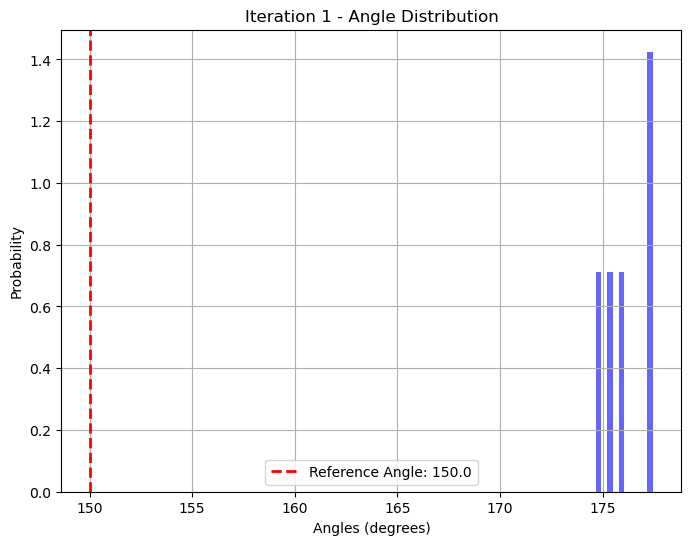

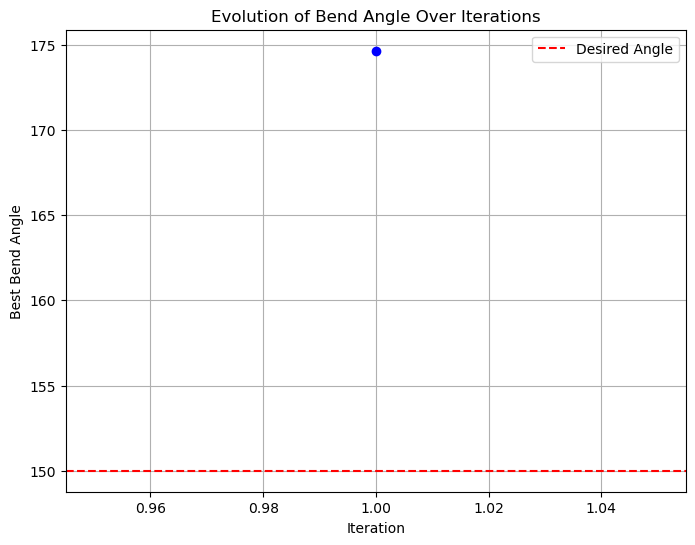

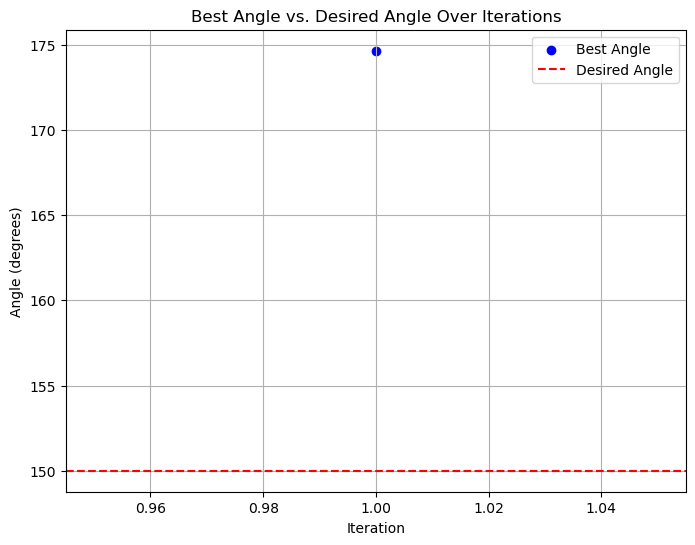

Iteration 1 completed.


Step 1: Iteration 2

Step 2: Processing structure 0 in iteration 2

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [-0.1025331   0.12897996 -2.09942755]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 5

Strand indices in the sphere: [2, 41, 12, 13, 14, 31]
Strand indices to be removed: [41, 12, 13, 14, 31]
Removing strand index: 41
Removing strand index: 12
Removing strand index: 13
Removing strand index: 14
Removing strand index: 31
Total number of new structures created: 5
Step 7: Removed strands within the sphere. Number of mutants generated: 5

Step 8: By modifying structure 0, 5 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.514 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.558 MB/s



All queued simulations finished in: 10.508656921098009
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.3837640779092908
Finished: eq
All queued simulations finished in: 0.5193308698944747
Equilibration simulation for structure 0 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	814.176 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.14 MB/s



Running: prod
Run time: 0.3801555910613388
Finished: prod
All queued simulations finished in: 0.5172429131343961
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	816.091 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.45 MB/s



Running: relaxed
Run time: 2.954826520057395
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.505 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.545 MB/s



All queued simulations finished in: 10.515465163160115
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.3773655821569264
Finished: eq
All queued simulations finished in: 0.5242375489324331
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	808.707 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.2 MB/s



Running: prod
Run time: 0.35955416481010616
Finished: prod
All queued simulations finished in: 0.5096854160074145
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 12: Starting simulations for structure 2...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	810.086 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.66 MB/s



Running: relaxed
Run time: 2.8728808278683573
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.513 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.568 MB/s



All queued simulations finished in: 10.510383615037426
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.3630117420107126
Finished: eq
All queued simulations finished in: 0.5163008619565517
Equilibration simulation for structure 2 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	812.513 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.61 MB/s



Running: prod
Run time: 0.3391552329994738
Finished: prod
All queued simulations finished in: 0.5197913791052997
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Simulation completed for structure 2

Step 12: Starting simulations for structure 3...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	814.102 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.96 MB/s



Running: relaxed
Run time: 2.954000721918419
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.505 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.546 MB/s



All queued simulations finished in: 10.509149783058092
Relaxation simulation for structure 3 completed.
Running: eq
Run time: 0.4085528329014778
Finished: eq
All queued simulations finished in: 0.5235696770250797
Equilibration simulation for structure 3 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	808.688 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     3.88 MB/s



Running: prod
Run time: 0.378902749158442
Finished: prod
All queued simulations finished in: 0.5098513180855662
Production simulation for structure 3 completed.
All simulations for mutant 3 completed.

Simulation completed for structure 3

Step 12: Starting simulations for structure 4...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	810.383 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.66 MB/s



Running: relaxed
Run time: 2.84479096182622
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.509 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.567 MB/s



All queued simulations finished in: 10.511489070020616
Relaxation simulation for structure 4 completed.
Running: eq
Run time: 0.36551215895451605
Finished: eq
All queued simulations finished in: 0.508856832049787
Equilibration simulation for structure 4 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	810.514 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.55 MB/s



Running: prod
Run time: 0.37749607814475894
Finished: prod


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	812.279 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.38 MB/s



All queued simulations finished in: 0.5218254879582673
Production simulation for structure 4 completed.
All simulations for mutant 4 completed.

Simulation completed for structure 4

Step 13: Structure 0 - Bend Angle: 168.66665589983663

Step 13: Structure 1 - Bend Angle: 167.19834313729282

Step 13: Structure 2 - Bend Angle: 171.7021241995454

Step 13: Structure 3 - Bend Angle: 170.009709145037

Step 13: Structure 4 - Bend Angle: 169.44216732913537

Step 14: Evaluating fitness for each structure...
Fitness scores: [18.666655899836627, 17.198343137292824, 21.70212419954541, 20.009709145036993, 19.442167329135373]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 1 with angle: 167.19834313729282 and fitness score: 17.198343137292824

Step 17: Plotting histograms and evolution graphs...


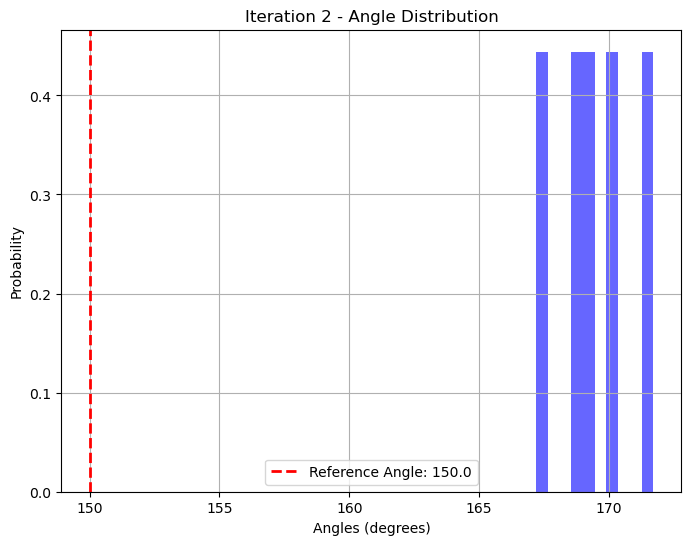

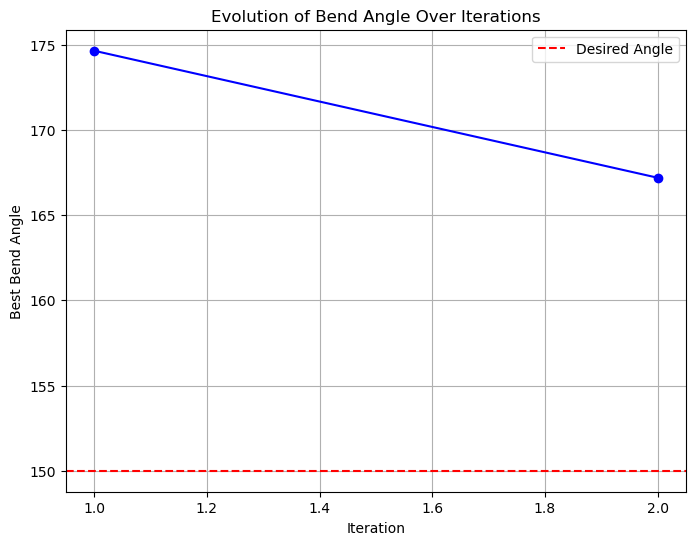

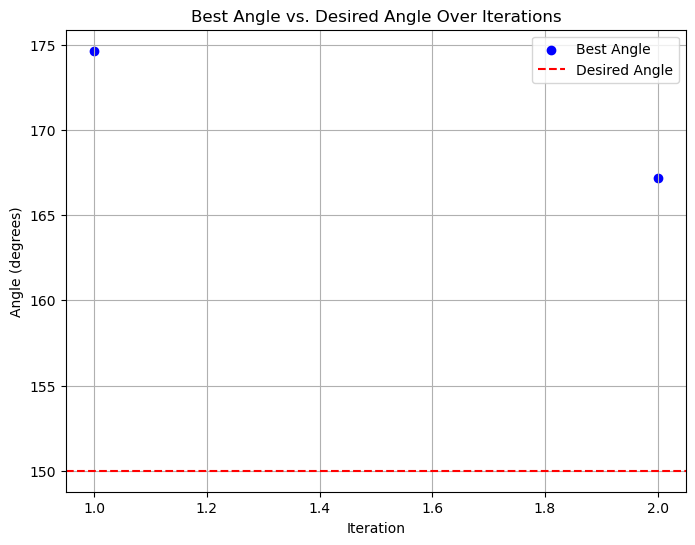

Iteration 2 completed.


Step 1: Iteration 3

Step 2: Processing structure 0 in iteration 3

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [-0.37034343  0.03745197  1.20839302]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 5

Strand indices in the sphere: [2, 40, 12, 13, 30, 31]
Strand indices to be removed: [40, 12, 13, 30, 31]
Removing strand index: 40
Removing strand index: 12
Removing strand index: 13
Removing strand index: 30
Removing strand index: 31
Total number of new structures created: 5
Step 7: Removed strands within the sphere. Number of mutants generated: 5

Step 8: By modifying structure 0, 5 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.495 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.585 MB/s



All queued simulations finished in: 10.509050538996235
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.35464226990006864
Finished: eq
All queued simulations finished in: 0.508185924962163
Equilibration simulation for structure 0 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	803.040 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.54 MB/s



Running: prod
Run time: 0.3534778789617121
Finished: prod
All queued simulations finished in: 0.5102861770428717
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	804.838 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.69 MB/s



Running: relaxed
Run time: 2.7469025298487395
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.491 MB written to files
	 96.000  B written to stdout/stderr
	For a total of     0.58 MB/s



All queued simulations finished in: 10.513527441071346
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.36637980910018086
Finished: eq
All queued simulations finished in: 0.508191229077056
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	800.990 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.35 MB/s



Running: prod
Run time: 0.3704901491291821
Finished: prod
All queued simulations finished in: 0.5215573760215193
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 12: Starting simulations for structure 2...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	802.625 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.46 MB/s



Running: relaxed
Run time: 2.8426074469462037
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.484 MB written to files
	 96.000  B written to stdout/stderr
	For a total of     0.56 MB/s



All queued simulations finished in: 10.509727471042424
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.3900360141415149
Finished: eq
All queued simulations finished in: 0.5092330421321094
Equilibration simulation for structure 2 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	797.360 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.26 MB/s



Running: prod
Run time: 0.37446605414152145
Finished: prod
All queued simulations finished in: 0.5217336800415069
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Simulation completed for structure 2

Step 12: Starting simulations for structure 3...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	799.178 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.24 MB/s



Running: relaxed
Run time: 2.783670665929094
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.486 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.571 MB/s



All queued simulations finished in: 10.51042119297199
Relaxation simulation for structure 3 completed.
Running: eq
Run time: 0.35380118899047375
Finished: eq
All queued simulations finished in: 0.5250780219212174
Equilibration simulation for structure 3 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	799.516 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.69 MB/s



Running: prod
Run time: 0.3605100358836353
Finished: prod
All queued simulations finished in: 0.5284399830270559
Production simulation for structure 3 completed.
All simulations for mutant 3 completed.

Simulation completed for structure 3

Step 12: Starting simulations for structure 4...


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	800.687 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.82 MB/s



Running: relaxed
Run time: 2.7418756110128015
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.486 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.581 MB/s



All queued simulations finished in: 10.509848101064563
Relaxation simulation for structure 4 completed.
Running: eq
Run time: 0.35636775218881667
Finished: eq
All queued simulations finished in: 0.5165330651216209
Equilibration simulation for structure 4 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	799.565 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.65 MB/s



Running: prod
Run time: 0.35789998690597713
Finished: prod


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	800.700 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      4.8 MB/s



All queued simulations finished in: 0.5311509699095041
Production simulation for structure 4 completed.
All simulations for mutant 4 completed.

Simulation completed for structure 4

Step 13: Structure 0 - Bend Angle: 150.20355401415398

Step 13: Structure 1 - Bend Angle: 163.7259708969786

Step 13: Structure 2 - Bend Angle: 158.16387142946897

Step 13: Structure 3 - Bend Angle: 161.77380819589197

Step 13: Structure 4 - Bend Angle: 166.7122666250061

Step 14: Evaluating fitness for each structure...
Fitness scores: [0.20355401415397978, 13.725970896978595, 8.16387142946897, 11.773808195891974, 16.712266625006095]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 0 with angle: 150.20355401415398 and fitness score: 0.20355401415397978

Step 16: Best mutant structure ID 0 has achieved the desired angle within tolerance.

Step 17: Plotting histograms and evolution graphs...


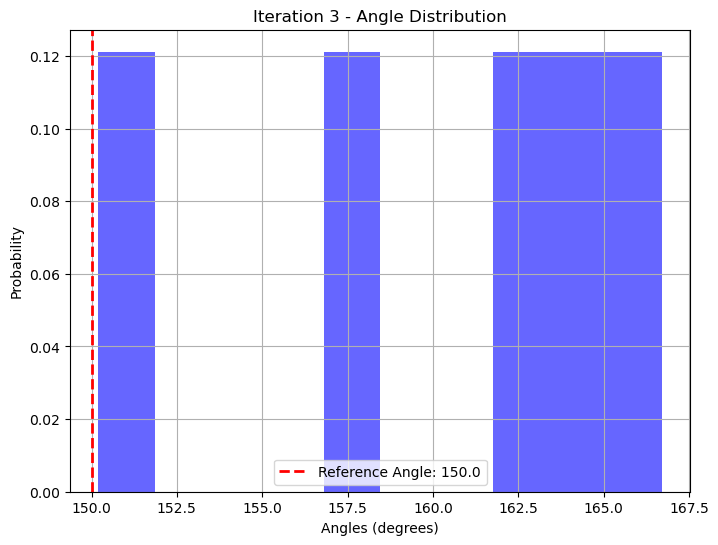

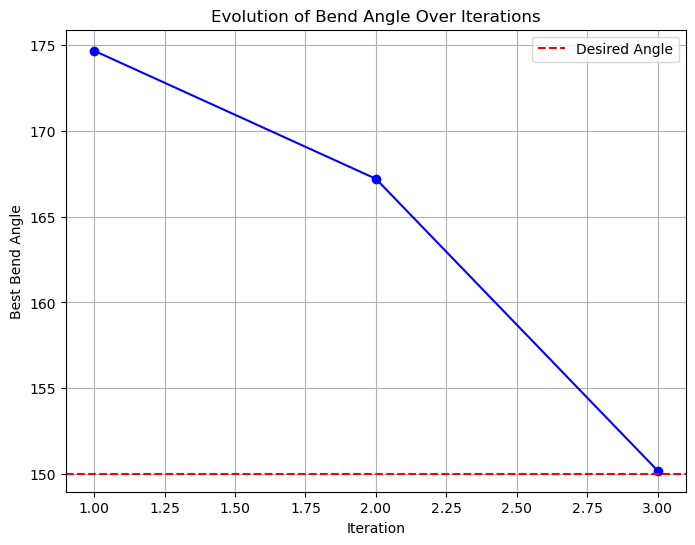

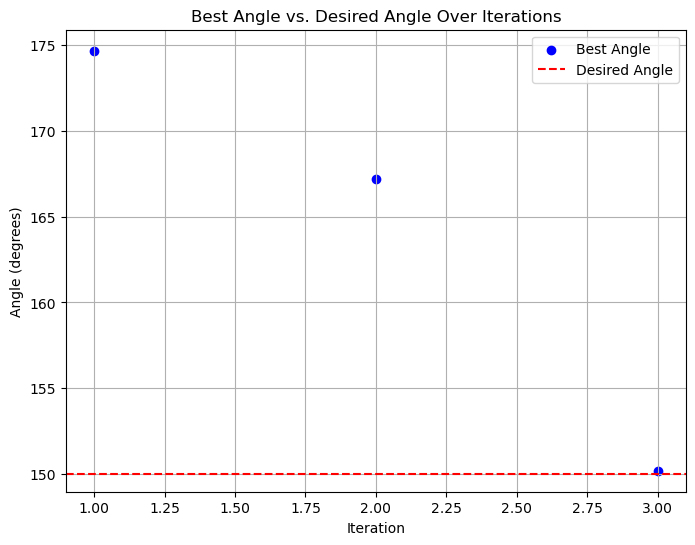

Iteration 3 completed.


Step 1: Iteration 4

Step 2: Processing structure 0 in iteration 4

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [ 0.13382977  0.32439679 -1.29098909]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 3

Strand indices in the sphere: [2, 12, 13, 30]
Strand indices to be removed: [12, 13, 30]
Removing strand index: 12
Removing strand index: 13
Removing strand index: 30
Total number of new structures created: 3
Step 7: Removed strands within the sphere. Number of mutants generated: 3

Step 8: By modifying structure 0, 3 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.480 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.581 MB/s



All queued simulations finished in: 10.508646378992125
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.38751031504943967
Finished: eq
All queued simulations finished in: 0.5228841009084135
Equilibration simulation for structure 0 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	795.146 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.03 MB/s



Running: prod
Run time: 0.35675024008378386
Finished: prod
All queued simulations finished in: 0.5193259681109339
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	797.148 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.55 MB/s



Running: relaxed
Run time: 2.7872663200832903
Finished: relaxed


INFO: Lists updated 2 times (every ~50.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.475 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.565 MB/s



All queued simulations finished in: 10.51587995281443
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.35609860997647047
Finished: eq
All queued simulations finished in: 0.5086537150200456
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	791.650 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.43 MB/s



Running: prod
Run time: 0.32832827884703875
Finished: prod
All queued simulations finished in: 0.524871852947399
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 12: Starting simulations for structure 2...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	793.006 KB written to files
	 62.000  B written to stdout/stderr
	For a total of        5 MB/s



Running: relaxed
Run time: 2.7278490441385657
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.478 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.579 MB/s



All queued simulations finished in: 10.50961197516881
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.33247647411189973
Finished: eq
All queued simulations finished in: 0.5079579860903323
Equilibration simulation for structure 2 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	793.670 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.87 MB/s



Running: prod
Run time: 0.3433755091391504
Finished: prod


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	794.980 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.79 MB/s



All queued simulations finished in: 0.5085372840985656
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Simulation completed for structure 2

Step 13: Structure 0 - Bend Angle: 157.3330793887468

Step 13: Structure 1 - Bend Angle: 159.67650598948282

Step 13: Structure 2 - Bend Angle: 157.00763247670915

Step 14: Evaluating fitness for each structure...
Fitness scores: [7.333079388746796, 9.67650598948282, 7.007632476709148]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 2 with angle: 157.00763247670915 and fitness score: 7.007632476709148

Step 17: Plotting histograms and evolution graphs...


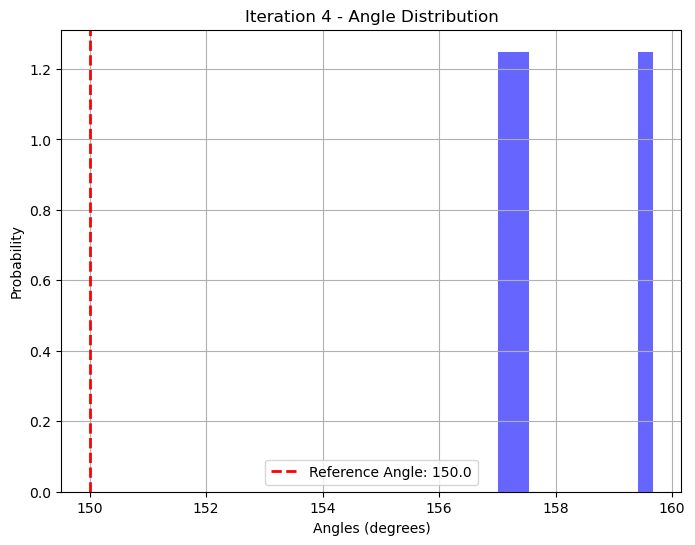

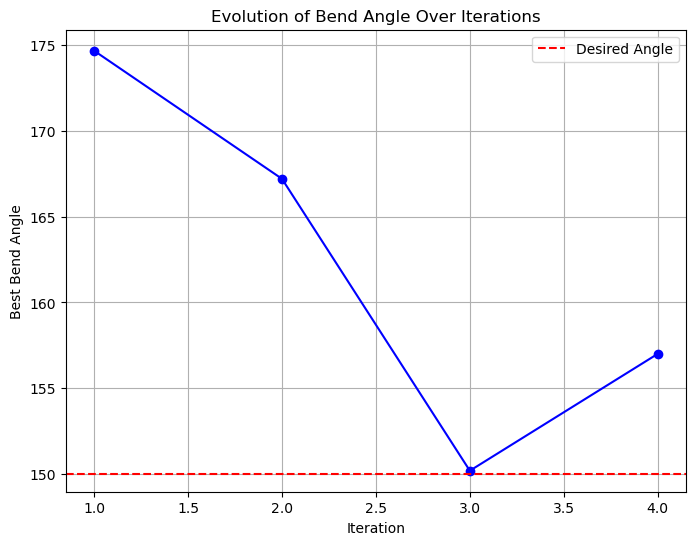

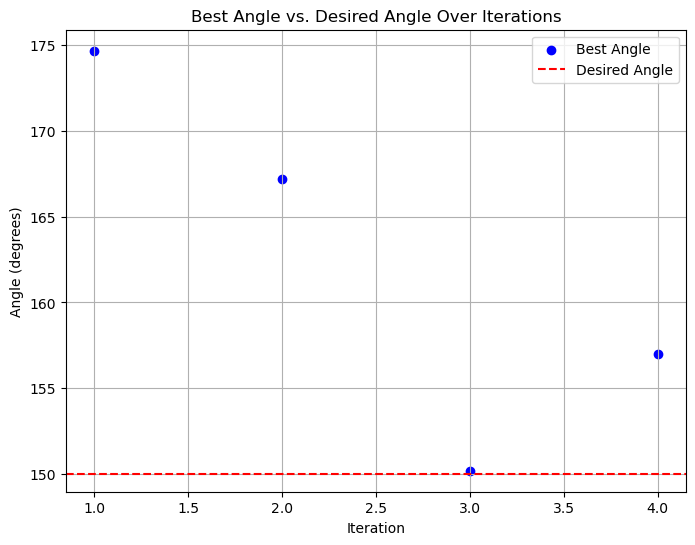

Iteration 4 completed.


Step 1: Iteration 5

Step 2: Processing structure 0 in iteration 5

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [-0.74849465 -0.17776879  3.08303532]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 3

Strand indices in the sphere: [2, 12, 13, 30]
Strand indices to be removed: [12, 13, 30]
Removing strand index: 12
Removing strand index: 13
Removing strand index: 30
Total number of new structures created: 3
Step 7: Removed strands within the sphere. Number of mutants generated: 3

Step 8: By modifying structure 0, 3 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.461 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.571 MB/s



All queued simulations finished in: 10.509778931038454
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.35107455193065107
Finished: eq
All queued simulations finished in: 0.5080421071033925
Equilibration simulation for structure 0 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	785.991 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.63 MB/s



Running: prod
Run time: 0.34025055612437427
Finished: prod
All queued simulations finished in: 0.5213955929502845
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	787.486 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.92 MB/s



Running: relaxed
Run time: 2.743416365934536
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.456 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.567 MB/s



All queued simulations finished in: 10.508784338831902
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.3835734180174768
Finished: eq
All queued simulations finished in: 0.5081872860901058
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	782.170 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.04 MB/s



Running: prod
Run time: 0.34383810590952635
Finished: prod
All queued simulations finished in: 0.5185052850283682
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 12: Starting simulations for structure 2...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	783.824 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.84 MB/s



Running: relaxed
Run time: 2.7055822170805186
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.459 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.579 MB/s



All queued simulations finished in: 10.515318586025387
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.39566576993092895
Finished: eq
All queued simulations finished in: 0.5105559730436653
Equilibration simulation for structure 2 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	784.119 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     3.93 MB/s



Running: prod
Run time: 0.3610438359901309
Finished: prod


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	785.688 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.47 MB/s



All queued simulations finished in: 0.5183257621247321
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Simulation completed for structure 2

Step 13: Structure 0 - Bend Angle: 134.46279195774085

Step 13: Structure 1 - Bend Angle: 138.7997781710495

Step 13: Structure 2 - Bend Angle: 127.64928075356285

Step 14: Evaluating fitness for each structure...
Fitness scores: [15.537208042259152, 11.200221828950504, 22.35071924643715]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 1 with angle: 138.7997781710495 and fitness score: 11.200221828950504

Step 17: Plotting histograms and evolution graphs...


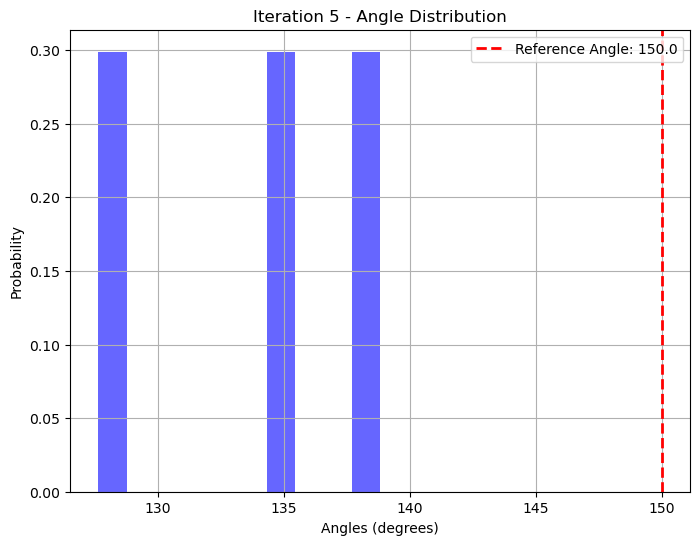

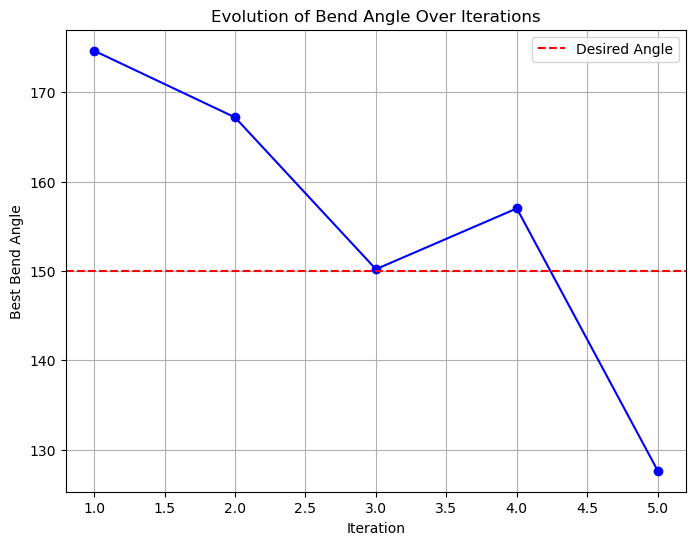

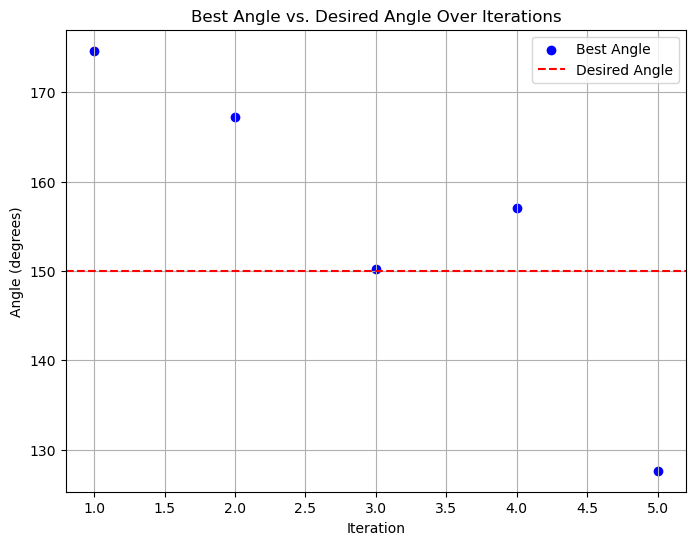

Iteration 5 completed.


Step 1: Iteration 6

Step 2: Processing structure 0 in iteration 6

Step 3: Longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7174bc3f6c50>
Longest strand index: 2

Step 4: Found a valid point in the DNA structure: [-0.66553318 -0.08444387  2.85985713]

Step 5: Defined a sphere around the valid point with radius 3.0

Step 6: Number of strands found in the sphere: 2

Strand indices in the sphere: [2, 12, 29]
Strand indices to be removed: [12, 29]
Removing strand index: 12
Removing strand index: 29
Total number of new structures created: 2
Step 7: Removed strands within the sphere. Number of mutants generated: 2

Step 8: By modifying structure 0, 2 mutant structures were produced.

Step 9: Updating left and right indices for each mutant...
Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,

INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.443 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.575 MB/s



All queued simulations finished in: 10.509523975895718
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.3576800459995866
Finished: eq
All queued simulations finished in: 0.5097526938188821
Equilibration simulation for structure 0 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	774.431 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.33 MB/s



Running: prod
Run time: 0.36126500903628767
Finished: prod
All queued simulations finished in: 0.5256059039384127
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Simulation completed for structure 0

Step 12: Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	776.228 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.47 MB/s



Running: relaxed
Run time: 2.7143751149997115
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.439 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.568 MB/s



All queued simulations finished in: 10.51309038605541
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.3762001870200038
Finished: eq
All queued simulations finished in: 0.510894033126533
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	772.839 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.08 MB/s



Running: prod
Run time: 0.3602592940442264
Finished: prod


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	774.284 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.21 MB/s



All queued simulations finished in: 0.5254160340409726
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Simulation completed for structure 1

Step 13: Structure 0 - Bend Angle: 138.7792331540629

Step 13: Structure 1 - Bend Angle: 145.83498352866968

Step 14: Evaluating fitness for each structure...
Fitness scores: [11.220766845937106, 4.165016471330318]

Step 15: Selecting the best mutants based on fitness scores...
Best mutant structure ID: 1 with angle: 145.83498352866968 and fitness score: 4.165016471330318

Step 16: Best mutant structure ID 1 has achieved the desired angle within tolerance.

Step 17: Plotting histograms and evolution graphs...


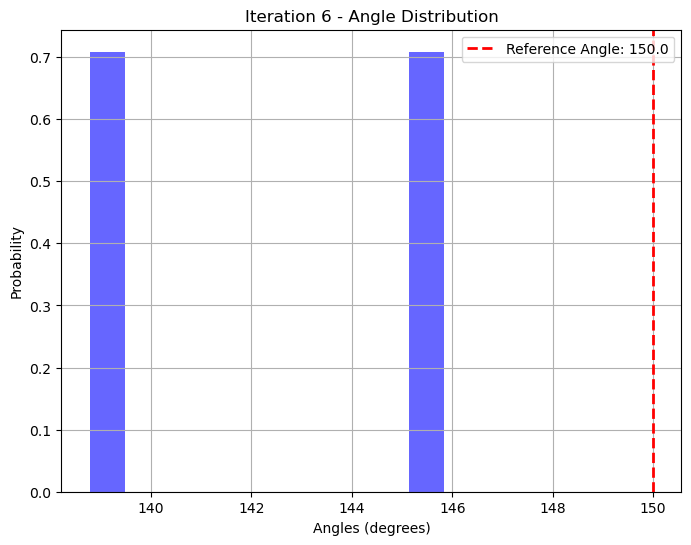

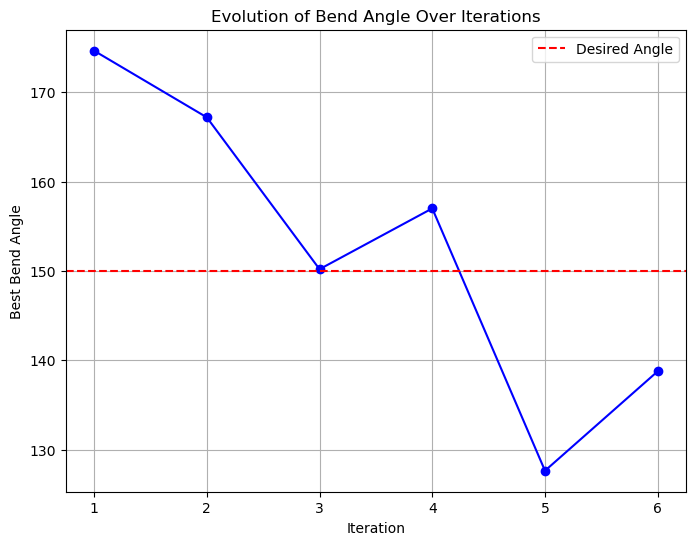

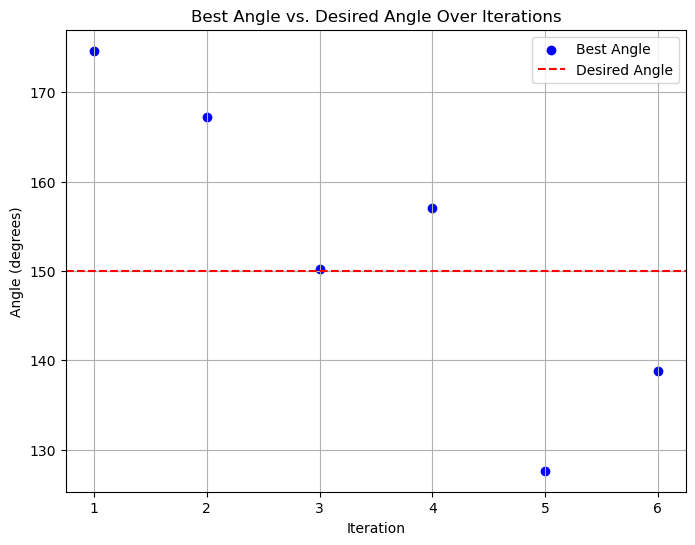

Iteration 6 completed.



([[27.46306409760311,
   26.006601639091798,
   24.656424758043585,
   25.382841958418766,
   27.41941645580664],
  [18.666655899836627,
   17.198343137292824,
   21.70212419954541,
   20.009709145036993,
   19.442167329135373],
  [0.20355401415397978,
   13.725970896978595,
   8.16387142946897,
   11.773808195891974,
   16.712266625006095],
  [7.333079388746796, 9.67650598948282, 7.007632476709148],
  [15.537208042259152, 11.200221828950504, 22.35071924643715],
  [11.220766845937106, 4.165016471330318]],
 [[177.4630640976031,
   176.0066016390918,
   174.65642475804358,
   175.38284195841877,
   177.41941645580664],
  [168.66665589983663,
   167.19834313729282,
   171.7021241995454,
   170.009709145037,
   169.44216732913537],
  [150.20355401415398,
   163.7259708969786,
   158.16387142946897,
   161.77380819589197,
   166.7122666250061],
  [157.3330793887468, 159.67650598948282, 157.00763247670915],
  [134.46279195774085, 138.7997781710495, 127.64928075356285],
  [138.7792331540629, 

In [7]:
initial_dna_structure = load_dna_structure_files(input_path)
evolutionary_algorithm(initial_dna_structure, left_indices, right_indices, num_iterations, num_best_structures, desired_angle, tolerance, base_path, sim_base_path, sphere_radius)